In [31]:
import pandas as pd
import re

# Read the list of filenames from the configuration file
with open('file_list.txt', 'r', encoding='utf-8') as config_file:
    file_names = config_file.read().splitlines()

# Regex pattern to match the data format
pattern = r'\[(.*?)\] (.*?): (.*)'


# Initialize an empty list to store parsed data
datalist = []
stream_count = 0
# Iterate over each specified file
for file in file_names:
    full_path = file
    with open(full_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            match = re.match(pattern, line)
            if match:
                date, user, message = match.groups()
                datalist.append([date, user, message,stream_count])
    stream_count = stream_count + 1

# Create a DataFrame from the parsed data
data = pd.DataFrame(datalist, columns=["date", "user", "message","stream"])

data['date'] = pd.to_datetime(data['date'])

data = data.sort_values(by=['user', 'date'])

#data2 = data[data['user'] == '1206paul_']
#data2 = data[data['user'] == 'balintboss']
#data2 = data[data['user'] == 'klimzaa']
data2 = data[data['user'] == 'Martin_Gales']
#data2 = data[data['user'] == 'IvanOnMyOwn']
#data2 = data[data['user'] == 'Trizze']
#data2 = data[data['user'] == 'MatthewTheTaxCollector']




# Calculate the total number of messages per stream
total_messages_per_stream = data2['stream'].value_counts()

# Combine the results into a single DataFrame
stream_stats = pd.DataFrame({
    'total_messages': total_messages_per_stream
})

# Calculate the time difference between the first and last messages for each stream
watch_lengths = data2.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['watch_length'] = watch_lengths

# Calculate the time difference between the first and last messages for each stream
stream_lengths = data.groupby('stream')['date'].agg(lambda x: (x.max() - x.min()).total_seconds())

# Add the stream_length column to the stream_stats DataFrame
stream_stats['stream_length'] = stream_lengths

stream_stats.head(10)

,total_messages,watch_length,stream_length
stream,,,
25,663,36103.0,36105.0
23,543,26305.0,26365.0
35,443,25142.0,25150.0
70,432,26835.0,26839.0
24,407,20904.0,20910.0
48,396,25881.0,25912.0
37,385,27141.0,27145.0
5,384,20382.0,20382.0
54,383,21595.0,21630.0


In [32]:
stream_stats.describe()

,total_messages,watch_length,stream_length
count,73.000000,73.000000,73.000000
mean,261.945205,18155.630137,18689.342466
std,120.315660,5683.652541,5274.138290
min,31.000000,3149.000000,5257.000000
25%,190.000000,16408.000000,17193.000000
50%,273.000000,18477.000000,18507.000000
75%,344.000000,21077.000000,21262.000000
max,663.000000,36103.000000,36105.000000


In [33]:
stream_stats['watch_length_in_hour'] = stream_stats['watch_length'] / 60 /60
stream_stats['stream_length_in_hour'] = stream_stats['stream_length'] / 60 /60

stream_stats.head(5)

,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour
stream,,,,,
25,663,36103.0,36105.0,10.028611,10.029167
23,543,26305.0,26365.0,7.306944,7.323611
35,443,25142.0,25150.0,6.983889,6.986111
70,432,26835.0,26839.0,7.454167,7.455278
24,407,20904.0,20910.0,5.806667,5.808333


In [34]:
stream_stats['persenteg'] = stream_stats['watch_length'] / stream_stats['stream_length'] * 100

stream_stats.head(5)



,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
stream,,,,,,
25,663,36103.0,36105.0,10.028611,10.029167,99.994461
23,543,26305.0,26365.0,7.306944,7.323611,99.772426
35,443,25142.0,25150.0,6.983889,6.986111,99.968191
70,432,26835.0,26839.0,7.454167,7.455278,99.985096
24,407,20904.0,20910.0,5.806667,5.808333,99.971306


In [35]:
stream_stats['persenteg'].describe()

count     73.000000
mean      96.747745
std       11.967814
min       21.482639
25%       99.513475
50%       99.889247
75%       99.970510
max      100.000000
Name: persenteg, dtype: float64

In [36]:
stream_stats = stream_stats.sort_values(by='persenteg')

stream_stats.head(10)


,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
stream,,,,,,
12,65,4399.0,20477.0,1.221944,5.688056,21.482639
41,31,3149.0,7832.0,0.874722,2.175556,40.206844
14,80,11806.0,15055.0,3.279444,4.181944,78.419130
40,78,19619.0,24536.0,5.449722,6.815556,79.960059
20,115,14673.0,17472.0,4.075833,4.853333,83.980082
65,143,16303.0,18147.0,4.528611,5.040833,89.838541
75,70,19238.0,20950.0,5.343889,5.819444,91.828162
57,199,16656.0,17445.0,4.626667,4.845833,95.477214
50,123,5032.0,5257.0,1.397778,1.460278,95.719992


In [37]:
stream_stats['watch_length_in_hour'].sum() /24

15.339826388888888

In [38]:
stream_stats = stream_stats.reset_index()
stream_stats = stream_stats.sort_values(by='stream')

stream_stats.head(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
39,0,198,17679.0,17697.0,4.910833,4.915833,99.898288
21,1,319,17777.0,17831.0,4.938056,4.953056,99.697157
41,2,250,19128.0,19147.0,5.313333,5.318611,99.900768
59,3,254,17448.0,17451.0,4.846667,4.847500,99.982809
63,4,273,18732.0,18734.0,5.203333,5.203889,99.989324
71,5,384,20382.0,20382.0,5.661667,5.661667,100.000000
42,6,195,16547.0,16563.0,4.596389,4.600833,99.903399
32,7,254,17751.0,17773.0,4.930833,4.936944,99.876217
52,8,354,18680.0,18686.0,5.188889,5.190556,99.967890
47,9,197,16408.0,16418.0,4.557778,4.560556,99.939091


In [39]:
stream_stats.tail(10)

,stream,total_messages,watch_length,stream_length,watch_length_in_hour,stream_length_in_hour,persenteg
18,64,221,18204.0,18293.0,5.056667,5.081389,99.513475
5,65,143,16303.0,18147.0,4.528611,5.040833,89.838541
45,66,374,23381.0,23400.0,6.494722,6.500000,99.918803
13,67,243,23246.0,23469.0,6.457222,6.519167,99.049810
44,68,190,18499.0,18515.0,5.138611,5.143056,99.913584
20,69,169,17933.0,18002.0,4.981389,5.000556,99.616709
60,70,432,26835.0,26839.0,7.454167,7.455278,99.985096
56,71,286,21339.0,21345.0,5.927500,5.929167,99.971890
58,72,350,19849.0,19854.0,5.513611,5.515000,99.974816
6,75,70,19238.0,20950.0,5.343889,5.819444,91.828162


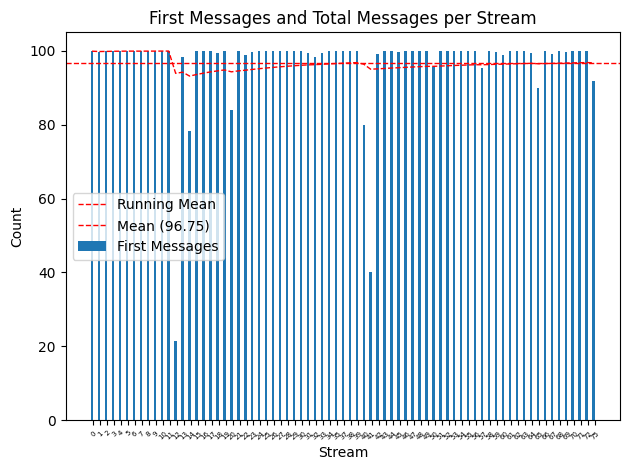

In [40]:
import matplotlib.pyplot as plt


# Plot the chart
fig, ax = plt.subplots()

# Bar width
bar_width = 0.35

# Bar positions
index = range(len(stream_stats))

# Bar plots
bar1 = ax.bar(index, stream_stats['persenteg'], bar_width, label='First Messages')

# Calculate mean of first messages
persenteg_messages = stream_stats['persenteg'].mean()

stream_stats['persenteg_avg'] = stream_stats['persenteg'].expanding().mean()

# Plot the running mean line
ax.plot(index, stream_stats['persenteg_avg'], color='r', linestyle='--', linewidth=1, label='Running Mean')

# Draw the mean line
ax.axhline(persenteg_messages, color='r', linestyle='--', linewidth=1, label=f'Mean ({persenteg_messages:.2f})')

# Labels and title
ax.set_xlabel('Stream', fontsize=10)
ax.set_ylabel('Count', fontsize=10)
ax.set_title('First Messages and Total Messages per Stream', fontsize=12)
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(stream_stats['stream'], fontsize=5)  # Adjust x-tick labels font size
ax.legend(fontsize=10)

# Display the plot
plt.xticks(rotation=45)  # Rotate x labels if necessary
plt.tight_layout()
plt.show()
